In [3]:
import pandas as pd

# Load the uploaded CSV file to examine its structure and content
uploaded_file_path = '/content/random_dataset_100k.csv'
uploaded_data = pd.read_csv(uploaded_file_path)

# Display basic information about the dataset
uploaded_data.info(), uploaded_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                100000 non-null  int64  
 1   Name              100000 non-null  object 
 2   Age               100000 non-null  int64  
 3   City              100000 non-null  object 
 4   Purchase Amount   100000 non-null  float64
 5   Date of Purchase  100000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


(None,
    ID     Name  Age      City  Purchase Amount     Date of Purchase
 0   1  fWGbmZJ   41   Chicago           679.66  2023-01-01 00:00:00
 1   2  UpjAxfh   54   Houston           411.65  2023-01-01 00:01:00
 2   3  gxZAvhG   20   Houston           220.69  2023-01-01 00:02:00
 3   4  UNHbcbz   19  New York           542.75  2023-01-01 00:03:00
 4   5  EBelXBw   26  New York           625.12  2023-01-01 00:04:00)

In [4]:
# Find rows with problematic date formats
invalid_dates = uploaded_data[~uploaded_data['Date of Purchase'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', na=False)]

# Count and preview problematic rows
num_invalid = len(invalid_dates)
invalid_dates_preview = invalid_dates.head()

{"Number of Invalid Dates": num_invalid, "Preview of Invalid Rows": invalid_dates_preview}


{'Number of Invalid Dates': 0,
 'Preview of Invalid Rows': Empty DataFrame
 Columns: [ID, Name, Age, City, Purchase Amount, Date of Purchase]
 Index: []}

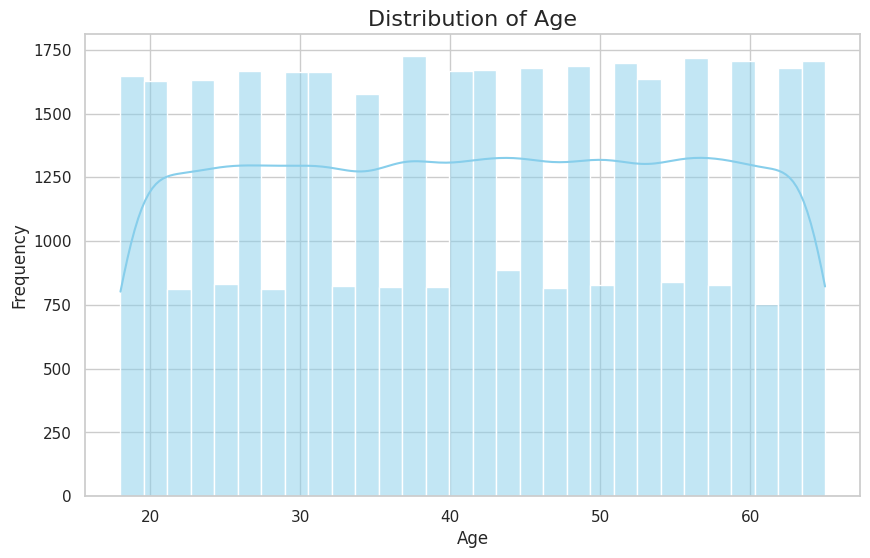

<ipython-input-6-63034a7a98ac>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_purchase.values, y=city_purchase.index, palette="viridis")


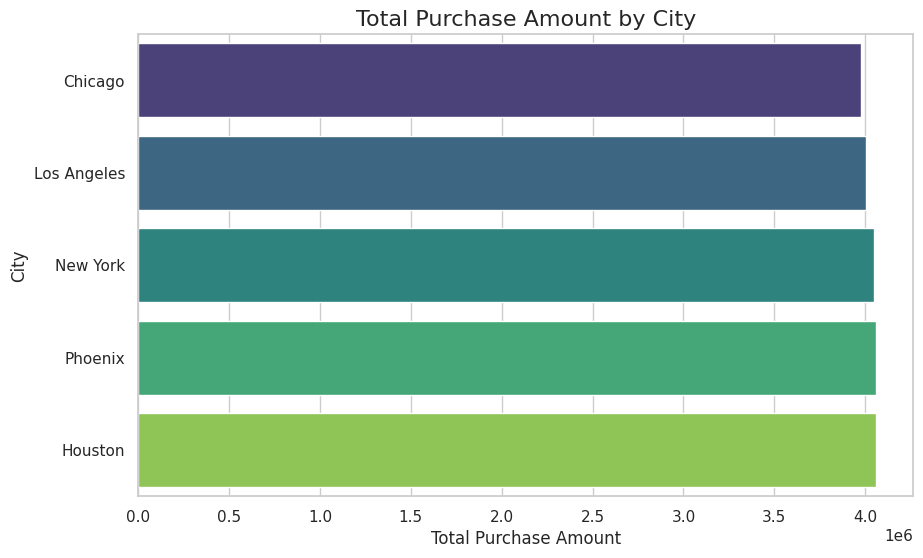

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Visualization 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(uploaded_data['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Visualization 2: Total Purchase Amount by City
plt.figure(figsize=(10, 6))
city_purchase = uploaded_data.groupby('City')['Purchase Amount'].sum().sort_values()
sns.barplot(x=city_purchase.values, y=city_purchase.index, palette="viridis")
plt.title("Total Purchase Amount by City", fontsize=16)
plt.xlabel("Total Purchase Amount", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()

# Visualization 3: Purchases Over Time
plt.figure(figsize=(12, 6))
uploaded_data['Date'] = uploaded_data['Date of Purchase'].dt.date
daily_purchase = uploaded_data.groupby('Date')['Purchase Amount'].sum()
sns.lineplot(x=daily_purchase.index, y=daily_purchase.values, color="orange")
plt.title("Daily Purchase Amount Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)
plt.xticks(rotation=45)
plt.show()


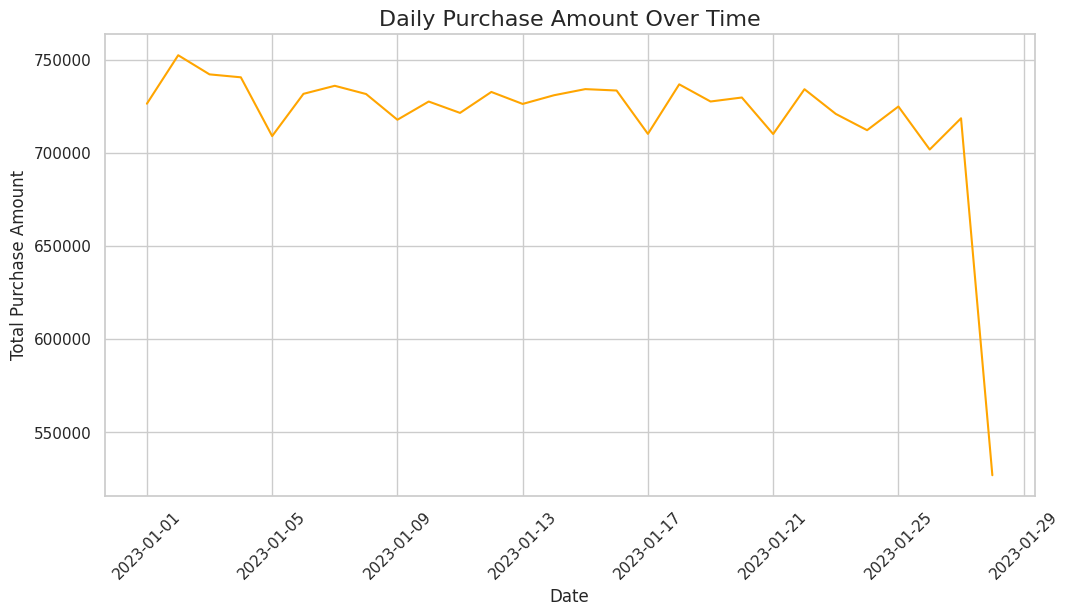

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your previous code) ...

# Visualization 3: Purchases Over Time
plt.figure(figsize=(12, 6))

# Convert 'Date of Purchase' to datetime objects before using .dt accessor
uploaded_data['Date of Purchase'] = pd.to_datetime(uploaded_data['Date of Purchase'])

uploaded_data['Date'] = uploaded_data['Date of Purchase'].dt.date
daily_purchase = uploaded_data.groupby('Date')['Purchase Amount'].sum()
sns.lineplot(x=daily_purchase.index, y=daily_purchase.values, color="orange")
plt.title("Daily Purchase Amount Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file to examine its structure and content
uploaded_file_path = '/content/random_dataset_100k.csv'  # Update with your file path
uploaded_data = pd.read_csv(uploaded_file_path)

# ... (rest of your code) ...

# Tentukan tanggal akhir (tanggal terbaru dalam data) dan rentang waktu satu tahun
# Convert 'Date of Purchase' to datetime objects before getting the max
uploaded_data['Date of Purchase'] = pd.to_datetime(uploaded_data['Date of Purchase'])
end_date = uploaded_data['Date of Purchase'].max()
start_date = end_date - pd.Timedelta(days=365)

# ... (rest of your code) ...

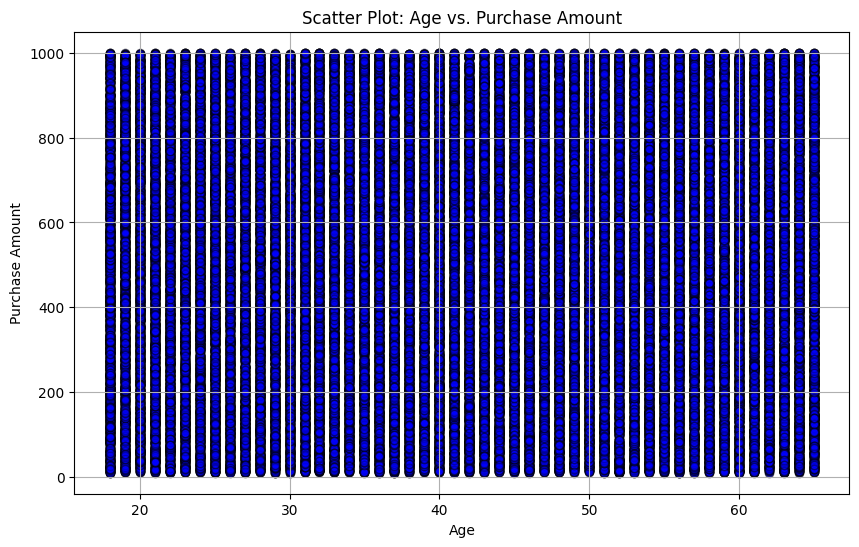

In [6]:
# Reload the dataset to ensure `data` is defined
csv_file_path = '/content/random_dataset_100k.csv'  # Define the path to your CSV file
data = pd.read_csv(csv_file_path)

# Recreate the scatter plot for Age vs. Purchase Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Purchase Amount'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Scatter Plot: Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()